<a href="https://colab.research.google.com/github/Insomnia2304/PMP-2024/blob/main/Lab12/Ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Output()

Sampling chain 0, 10 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━  89% 0:00:01 / 0:00:06

Output()

ERROR:pymc.stats.convergence:There were 25 divergences after tuning. Increase `target_accept` or reparameterize.


       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
α     0.278  0.799  -1.156    1.858      0.016    0.014    2599.0    2013.0   
β[0]  3.741  1.225   1.589    6.133      0.023    0.017    2833.0    2635.0   
β[1]  5.033  1.121   3.093    7.188      0.024    0.017    2303.0    2626.0   

      r_hat  
α       1.0  
β[0]    1.0  
β[1]    1.0  


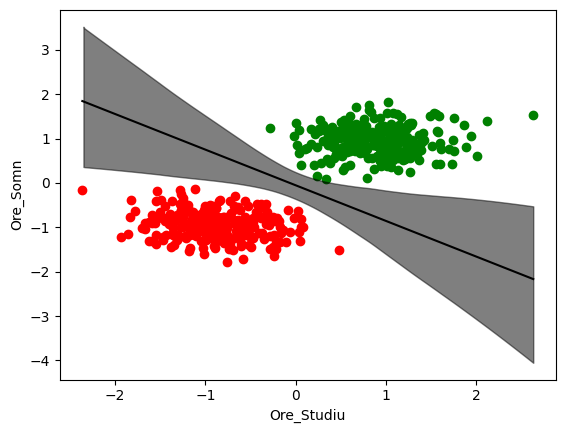

In [6]:
import pandas as pd
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

df = pd.read_csv('date_promovare_examen.csv')

x_n = ['Ore_Studiu', 'Ore_Somn']
x_1 = df[x_n].values
x_1_n = (x_1 - x_1.mean(axis=0)) / x_1.std(axis=0)
y_1 = df['Promovare'].values

with pm.Model() as model_1:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=2, shape=len(x_n))

    μ = α + pm.math.dot(x_1_n, β)
    θ = pm.Deterministic('θ', 1 / (1 + pm.math.exp(-μ)))
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_1_n[:, 0])

    yl = pm.Bernoulli('yl', p=θ, observed=y_1)

    idata_1 = pm.sample(2000, return_inferencedata=True)

idx = np.argsort(x_1_n[:, 0])
bd = idata_1.posterior['bd'].mean(("chain", "draw"))[idx]
plt.scatter(x_1_n[:, 0][y_1 == 0], x_1_n[:, 1][y_1 == 0], color='red')
plt.scatter(x_1_n[:, 0][y_1 == 1], x_1_n[:, 1][y_1 == 1], color='green')
plt.xlabel(x_n[0])
plt.ylabel(x_n[1])
plt.plot(x_1_n[:, 0][idx], bd, color='k')
az.plot_hdi(x_1_n[:, 0], idata_1.posterior['bd'], color='k')

print(az.summary(idata_1, var_names=['α', 'β']))
